# Logistic Regression Model 1 #

## Import Libraries ##

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math

## Model and Gradient Descent Algorithm Code ## 

In [92]:
def gradient_descent_without_scikit(y_train_n, w_init, b_init, x_train_n, iterations, a):

    m = x_train_n.shape[0]
    dj_db_history = np.zeros(iterations)
    dj_dw_history = np.zeros((iterations, w_init.size))
    j_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations,m))
    w = w_init
    b = b_init

    y_pred = compute_y_pred(w, x_train_n, b)
    for i in range(iterations):
        dj_db, dj_dw = compute_gradient_1(y_pred, y_train_n, x_train_n)
        j_history[i] = compute_cost(y_pred, y_train_n)
        dj_db_history[i] = dj_db
        dj_dw_history[i] = dj_dw
        b = b - a * dj_db
        w = w - a * dj_dw
        y_pred = compute_y_pred(w, x_train_n, b)
        y_pred_history[i,:] = y_pred
    y_final_pred = predict(y_pred_history[-1])
    return w, b, y_final_pred, dj_dw_history, dj_db_history, j_history, y_pred_history

def compute_gradient_1(y_pred, y_train_n, x_train_n):
    m=y_pred.size
    n=x_train_n.shape[1]
    dj_dw = np.zeros(x_train_n.shape)
    dj_db = np.zeros(m)
    for i in range(m):
        dj_db[i]=(y_pred[i]-y_train_n[i])
        for j in range(n):
            dj_dw[i, j] = ((y_pred[i] - y_train_n[i]) * x_train_n[i, j])

    w_cost =np.zeros(n)
    for i in range(n):
        w_cost[i]=np.sum(dj_dw[:, i])

    w_cost = w_cost / m
    b_cost = np.sum(dj_db)/m
    return b_cost, w_cost


def compute_cost(y_predicted, y_actual):
    # both numpy arrays 
    loss = np.zeros(y_predicted.size)
    for i in range(y_predicted.size):
        loss[i]=(-1*y_actual[i]*math.log(y_predicted[i])) + (-1*(1-y_actual[i])*math.log(1-y_predicted[i]))
                 
    cost = np.sum(loss) / y_predicted.size
    return cost


def compute_y_pred(w, x, b):
    m = x.shape[0]
    y_pred = np.zeros(m)
    for i in range(m):
        z = np.dot(x[i], w)+b
        y_pred[i] = 1 / (1 + np.exp(-1*z) )
    return y_pred


def predict(y_pred):
    m = y_pred.size
    y_result = np.zeros(m, dtype=int)
    for i in range(m):
        if y_pred[i]>=0.5:
            y_result[i] = 1
        else:
            y_result[i] = 0
    return y_result

## Importing Data and Removing Nulls ##

In [16]:
df = pd.read_csv('datasets/framingham.csv')

In [17]:
y = df['TenYearCHD']
x = df.drop(['TenYearCHD'], axis=1)

In [29]:
y.isnull().sum()

0

In [36]:
x.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
dtype: int64

In [38]:
x = x.fillna(0)

In [40]:
x.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

## Split Data and Convert to Numpy Arrays ##

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [42]:
x_train_n = x_train.to_numpy()
x_test_n = x_test.to_numpy()
y_train_n = y_train.to_numpy()
y_test_n = y_test.to_numpy()

In [43]:
y_train_n

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

## Run Logistic Regression Model ##

In [104]:
m = x_train_n.shape[0]
n = x_train_n.shape[1]
w = np.zeros(n)
# w = np.array([.55, 6.6, 7.8, 8.0])
b = 0.0
iterations = 50
learning_rate = .0001

w, b, y_final_pred, dj_dw_history, dj_db_history, j_history, y_pred_history = gradient_descent_without_scikit(y_train_n, w, b, x_train_n, iterations, learning_rate)

convergence_point = j_history[-1]
gradient_w = dj_dw_history[-1]
gradient_b = dj_db_history[-1]
epsilon = j_history[-2] - j_history[-1]

print(f"the cost function decreased by {epsilon} "
      f"It should decrease by {learning_rate}")
print(f"lowest cost using gradient descent is {convergence_point}")

# expected = compute_cost(y_lr_train_pred, y_train_n)
# print(f"the expected cost using scikit LR is {expected}")

the cost function decreased by 8.531128283034706e-05 It should decrease by 0.0001
lowest cost using gradient descent is 0.43551475836120984


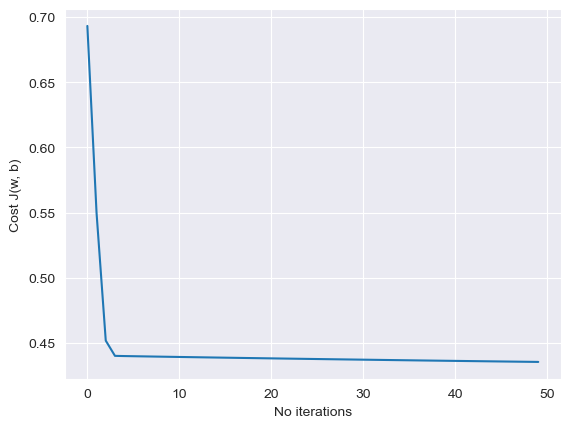

In [105]:
# Set the y-axis label
plt.ylabel('Cost J(w, b)')
# Set the x-axis label
plt.xlabel('No iterations')
plt.plot(np.arange(iterations), j_history)

In [106]:
w

array([ 2.50040653e-05, -6.38586342e-05, -2.63081517e-04, -3.58069191e-05,
       -2.08506844e-05,  2.90188602e-05,  8.29408457e-06,  1.47354690e-04,
        2.88453157e-05, -4.03383682e-03, -6.53493513e-04, -2.82415860e-03,
       -1.64659158e-03, -5.15267260e-03,  5.54135156e-04])

In [107]:
b

-8.198659193762019e-05

In [108]:
y_final_pred

array([0, 0, 0, ..., 0, 0, 0])

## Compute Model Accuracy with Training and Testing Data ##

In [109]:
#Compute accuracy on our training set
# p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(y_final_pred == y_train_n) * 100))

Train Accuracy: 85.014749


In [110]:
predicting_y_test = compute_y_pred(w, x_test_n, b)
predicting_y_test = predict(predicting_y_test)
predicting_y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
print('Train Accuracy of Calculated Model on Test Data: %f'%(np.mean(predicting_y_test == y_test_n) * 100))

Train Accuracy of Calculated Model on Test Data: 83.962264


## Miscellaneous ## 

In [56]:
# TESTING compute_y_pred function
m = x_train_n.shape[0]
n = x_train_n.shape[1]
w = np.zeros(n)
# w = np.array([.55, 6.6, 7.8, 8.0])
b = 0.0
y_pred = compute_y_pred(w, x_train_n, b)
y_pred

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])

In [59]:
# TESTING compute_cost function
pred_test = np.array([.5, .88, .9])
actual_test = np.array([0, 1, 1])
compute_cost(pred_test, actual_test)

0.3087803559092188